In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import logging
# from imp import reload
from datetime import datetime, timedelta
# import sys
# sys.path.append("../")

from kats.consts import TimeSeriesData
# reload(logging)
from hydrophone_data_processing import load, useful_variables, plotting
import obspy


In [2]:
day141_paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
day141 = load.import_corrected_data_for_single_day(day141_paths)


day141_snapshot = day141.slice(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
                   ,endtime=obspy.UTCDateTime('2019-05-21T09:00:00'))

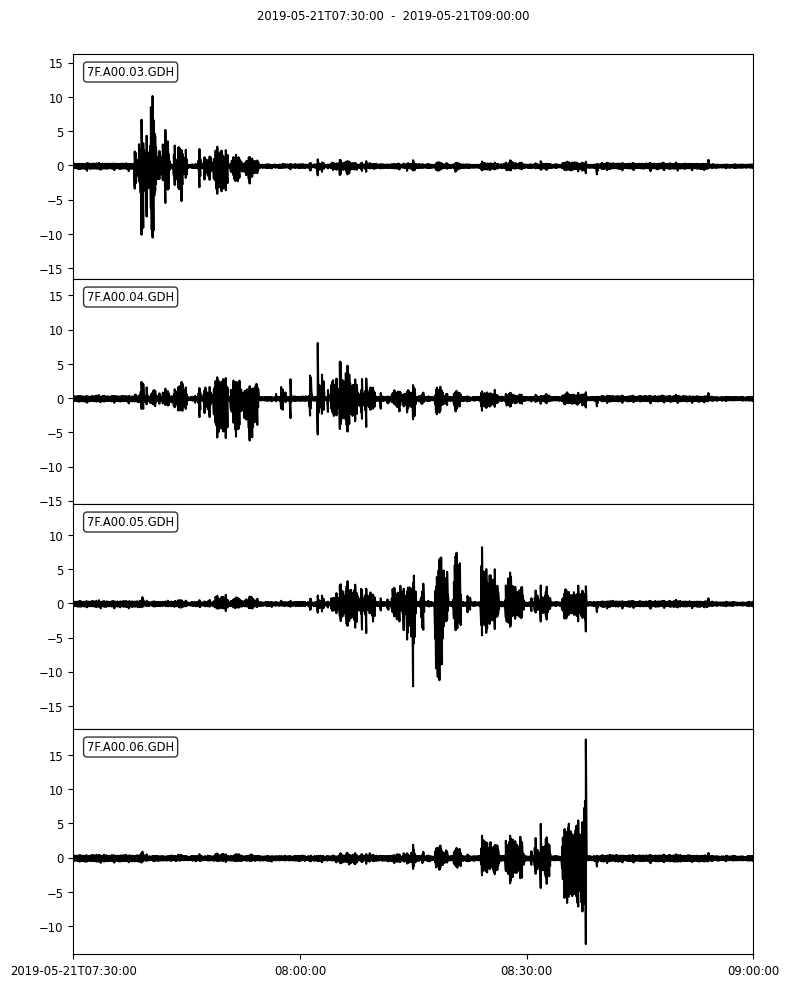

In [3]:
x = day141_snapshot[2:].plot()

In [4]:
# for n, tr in enumerate(day141_snapshot):
#     day141_snapshot[n].data = tr.data**2

In [5]:
# x = day141_snapshot[2:].plot()

In [6]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

In [7]:
from kats.consts import TimeSeriesData

In [23]:
data = day141_snapshot[2].copy()
data.data = data.data**2
data.decimate(factor=10)
data.decimate(factor=10)
h2 = TimeSeriesData(pd.DataFrame({'time':data.times(type='timestamp')*1e9
                            , 'value':data.data}))

In [24]:
detector = BOCPDetector(h2)

In [25]:
changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL # this is the default choice
)


/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



In [26]:
changepoints[0]

BOCPDChangePoint(start_time: 2019-05-21T07:37:22.000000000, end_time: 2019-05-21T07:37:22.000000000, confidence: 0.5174463854740655, model: BOCPDModelType.NORMAL_KNOWN_MODEL, ts_name: value)

[<AxesSubplot:>]

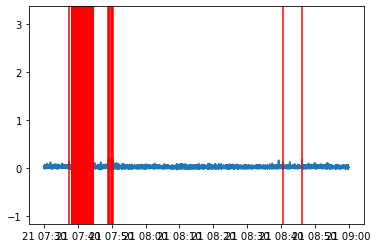

In [27]:
detector.plot(changepoints)


(18037.319444444445, 18037.320138888888)

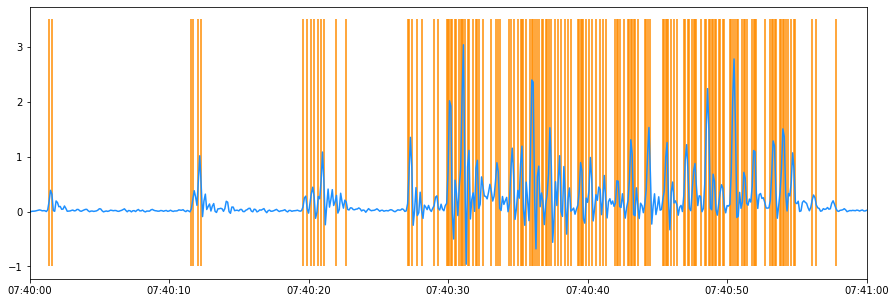

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.vlines([c.start_time for c in changepoints], -1, 3.5, color='darkorange')
ax.plot(h2.time, h2.value, color='dodgerblue')
ax.set_xlim(pd.to_datetime('2019-05-21 07:40:00')
            ,pd.to_datetime('2019-5-21 07:41:00')
           )

In [36]:
h2

,time,value
0,2019-05-21 07:30:00.000,6.060604e-13
1,2019-05-21 07:30:00.100,1.041785e-05
2,2019-05-21 07:30:00.200,4.067392e-04
3,2019-05-21 07:30:00.300,4.280147e-03
4,2019-05-21 07:30:00.400,1.774397e-02
...,...,...
53996,2019-05-21 08:59:59.600,3.792518e-03
53997,2019-05-21 08:59:59.700,4.498637e-03
53998,2019-05-21 08:59:59.800,2.138984e-02
53999,2019-05-21 08:59:59.900,2.049255e-02


In [14]:
# fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# for c in changepoints:
#     ax[1].fill_between(c.starttime)
#     break

In [15]:
# plt.xticks(rotation=45)
# fig, ax = plt.subplots(figsize=(15, 5))
# h2.plot()
# detector.plot(changepoints)
# plt.show()

In [16]:
# from kats.utils.simulator import Simulator

# sim = Simulator(n=450, start='2020-01-01', freq='H')
# ts_bocpd = sim.level_shift_sim(noise=0.05, seasonal_period=1)

In [17]:
# ts_bocpd

In [18]:
# from kats.consts import TimeSeriesData


In [19]:
# TimeSeriesData()

In [20]:
# TimeSeriesData(pd.DataFrame({'time':day141_snapshot[2].times(type='timestamp')*1e9
#                             , 'value':day141_snapshot[2].data}))

In [21]:
# day141_snapshot[2].times(type='timestamp')

In [22]:
# tr.stats.starttime